<a href="https://colab.research.google.com/github/DrVishalChaudhary/_DeepLearningProjects/blob/main/Binary_Classification_using_ANN_for_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification Problem: Supervised Learning

*   Classification between two classes; Cat and Dog

*   ANN model learn the patterns of data (Cat and Dog) during training

*   Accuracy depends on learning of model

    **Dataset:** Dogs Vs Cats stored in the drive locally

In [ ]:
# Library Import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import os

In [ ]:
# Data path
data_dir = "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog"

train_data_path = data_dir + '/Train/'
test_data_path = data_dir + '/Test/'

In [ ]:
train_data_path

'/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/'

In [ ]:
len(os.listdir(test_data_path))


2

# Identifying image size

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/Cat Vs Dog/Train/"

Cat  Dog


In [ ]:
# Average dimension for Cat images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/Cat'):
  img = imread(train_data_path + '/Cat/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(357.7486548808609, 413.9631053036126)

In [ ]:
# Average dimension for Dog images
first_dim1 = []
second_dim1 = []
for image_no in os.listdir(train_data_path + '/Dog'):
  img = imread(train_data_path + '/Dog/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim1.append(d1)
  second_dim1.append(d2)

In [ ]:
first_dim1_mean = np.mean(first_dim1)
second_dim1_mean = np.mean(second_dim1)
first_dim1_mean, second_dim1_mean

(364.63720215219064, 397.56879323597235)

In [ ]:
# First dimension average value
(358 + 364)/2

361.0

In [ ]:
# Second dimension average value
(414+399)/2

406.5

In [ ]:
# Input image shape used for learning of models
input_shape = (361, 406, 3)
input_shape

(361, 406, 3)

# Model1: 25, 10, 1

*   Three Dense layers with 25, 10, 1 neurons respectively

*   Activation functions: 'relu' and 'sigmoid'

*   Loss function: 'binary_crossentropy' due to binary class

*   Optimiser: Adam with default learning rate

*   Metric: Accuracy

*   No augmentation





In [ ]:
#Train and Test data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# Model1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(42)

model1 = Sequential()
model1.add(Flatten(input_shape = input_shape))
model1.add(Dense(25, activation = 'relu'))
model1.add(Dense(10, activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics= 'accuracy')

model1.fit(train_data, batch_size=32, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))


Epoch 1/20
82/82 [==============================] - 742s 9s/step - loss: 1.5167 - accuracy: 0.5154 - val_loss: 0.9537 - val_accuracy: 0.5125
Epoch 2/20
82/82 [==============================] - 19s 234ms/step - loss: 0.9200 - accuracy: 0.5400 - val_loss: 0.9701 - val_accuracy: 0.5025
Epoch 3/20
82/82 [==============================] - 19s 234ms/step - loss: 0.9195 - accuracy: 0.5542 - val_loss: 0.9785 - val_accuracy: 0.5125
Epoch 4/20
82/82 [==============================] - 18s 225ms/step - loss: 0.7078 - accuracy: 0.6057 - val_loss: 0.8842 - val_accuracy: 0.5175
Epoch 5/20
82/82 [==============================] - 19s 232ms/step - loss: 0.6603 - accuracy: 0.6280 - val_loss: 0.6983 - val_accuracy: 0.5550
Epoch 6/20
82/82 [==============================] - 19s 231ms/step - loss: 0.7002 - accuracy: 0.6207 - val_loss: 1.4577 - val_accuracy: 0.5025
Epoch 7/20
82/82 [==============================] - 19s 227ms/step - loss: 0.7026 - accuracy: 0.6141 - val_loss: 0.8427 - val_accuracy: 0.5125
E

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 439698)            0         
_________________________________________________________________
dense (Dense)                (None, 25)                10992475  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 10,992,746
Trainable params: 10,992,746
Non-trainable params: 0
_________________________________________________________________


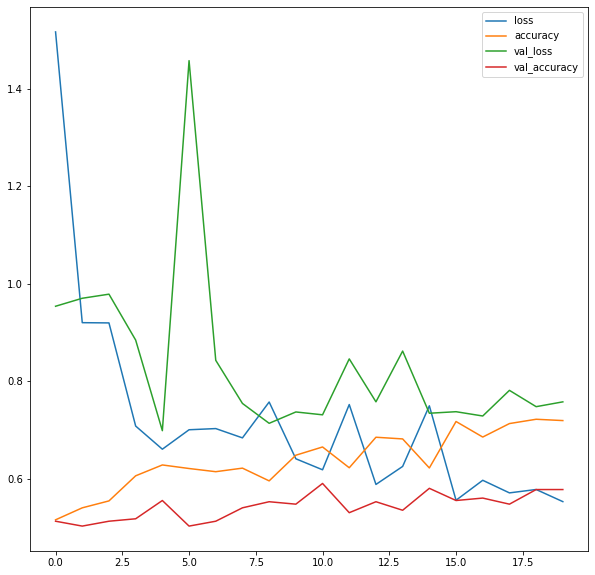

In [ ]:
# Bahaviour of loss and accuracy
pd.DataFrame(model1.history.history).plot(figsize = (10, 10))

In [ ]:
# Evaluation on test data
model1.evaluate(test_data)

13/13 [==============================] - 2s 188ms/step - loss: 0.7575 - accuracy: 0.5775


[0.7574752569198608, 0.5774999856948853]

# Model2: 25, 10, 1

*   Three Dense layers with 25, 10, 1 neurons respectively

*   Activation functions: 'relu' and 'sigmoid'

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* Augmentation

In [ ]:
# Train and Test data with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                                    width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen_augmented = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')
test_data_augmented = test_datagen_augmented.flow_from_directory(test_data_path, target_size=(361, 406), batch_size=32, class_mode='binary')

Found 2602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [ ]:
# Model2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(42)

model2 = Sequential()
model2.add(Flatten(input_shape = input_shape))
model2.add(Dense(25, activation = 'relu'))
model2.add(Dense(10, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics= 'accuracy')

model2.fit(train_data_augmented, batch_size=32, epochs=20, steps_per_epoch=len(train_data_augmented), 
                                validation_data=test_data_augmented, validation_steps=len(test_data_augmented))


Epoch 1/20
82/82 [==============================] - 93s 1s/step - loss: 1.4682 - accuracy: 0.4996 - val_loss: 0.8192 - val_accuracy: 0.5300
Epoch 2/20
82/82 [==============================] - 91s 1s/step - loss: 0.9527 - accuracy: 0.5269 - val_loss: 0.9319 - val_accuracy: 0.5350
Epoch 3/20
82/82 [==============================] - 92s 1s/step - loss: 0.9548 - accuracy: 0.5311 - val_loss: 0.7600 - val_accuracy: 0.5500
Epoch 4/20
82/82 [==============================] - 90s 1s/step - loss: 0.9254 - accuracy: 0.5380 - val_loss: 0.7167 - val_accuracy: 0.5600
Epoch 5/20
82/82 [==============================] - 90s 1s/step - loss: 1.4573 - accuracy: 0.5023 - val_loss: 0.8359 - val_accuracy: 0.5525
Epoch 6/20
82/82 [==============================] - 93s 1s/step - loss: 1.0523 - accuracy: 0.5488 - val_loss: 1.0580 - val_accuracy: 0.5075
Epoch 7/20
82/82 [==============================] - 90s 1s/step - loss: 1.1675 - accuracy: 0.5250 - val_loss: 1.1311 - val_accuracy: 0.5175
Epoch 8/20
82/82 [==

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 439698)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                10992475  
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 10,992,746
Trainable params: 10,992,746
Non-trainable params: 0
_________________________________________________________________


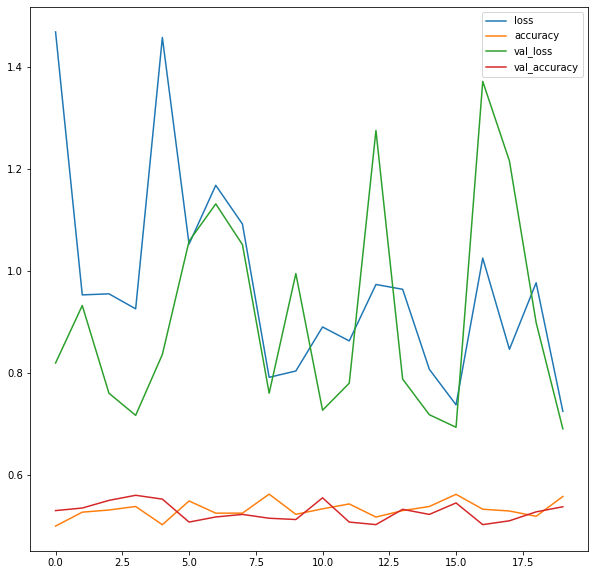

In [ ]:
# Bahaviour of loss and accuracy
pd.DataFrame(model2.history.history).plot(figsize = (10, 10))

In [ ]:
# Evaluation on test data
model2.evaluate(test_data)

13/13 [==============================] - 2s 186ms/step - loss: 0.6903 - accuracy: 0.5375


[0.6902798414230347, 0.5375000238418579]

# Model3: 64, 32, 1

* Three Dense layers with 64, 32, 1 neurons respectively

* Activation functions: 'relu' and 'sigmoid'

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* No augmentation

In [ ]:
#Model3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(42)

model3 = Sequential()
model3.add(Flatten(input_shape = input_shape))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dense(1, activation = 'sigmoid'))

model3.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics= 'accuracy')

model3.fit(train_data, batch_size=32, epochs=20, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/20
82/82 [==============================] - 20s 239ms/step - loss: 12.5783 - accuracy: 0.5073 - val_loss: 5.7431 - val_accuracy: 0.4925
Epoch 2/20
82/82 [==============================] - 19s 231ms/step - loss: 3.5250 - accuracy: 0.5500 - val_loss: 1.6960 - val_accuracy: 0.5600
Epoch 3/20
82/82 [==============================] - 19s 228ms/step - loss: 2.9898 - accuracy: 0.5500 - val_loss: 4.9014 - val_accuracy: 0.5000
Epoch 4/20
82/82 [==============================] - 19s 236ms/step - loss: 3.5736 - accuracy: 0.5676 - val_loss: 2.8426 - val_accuracy: 0.5075
Epoch 5/20
82/82 [==============================] - 19s 231ms/step - loss: 1.8583 - accuracy: 0.6134 - val_loss: 2.9432 - val_accuracy: 0.5100
Epoch 6/20
82/82 [==============================] - 19s 231ms/step - loss: 2.0616 - accuracy: 0.6011 - val_loss: 2.2935 - val_accuracy: 0.5225
Epoch 7/20
82/82 [==============================] - 19s 231ms/step - loss: 1.3699 - accuracy: 0.6368 - val_loss: 1.0425 - val_accuracy: 0.557

In [ ]:
#Model3 summary
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 439698)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                28140736  
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 28,142,849
Trainable params: 28,142,849
Non-trainable params: 0
_________________________________________________________________


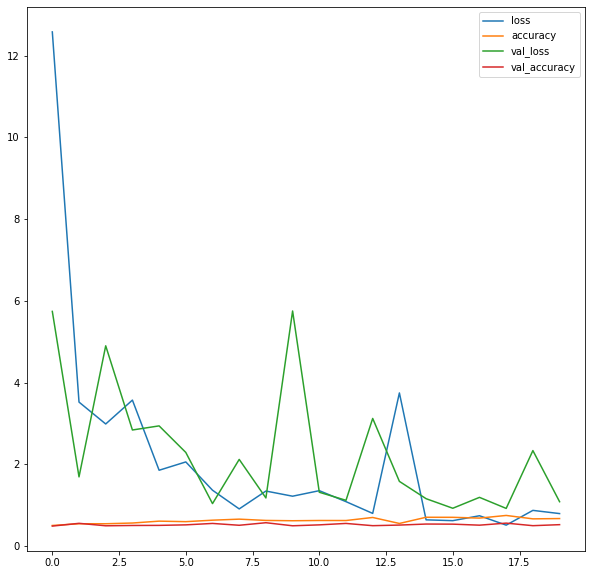

In [ ]:
# Bahaviour of loss and accuracy
pd.DataFrame(model3.history.history).plot(figsize = (10, 10))

In [ ]:
# Evaluation on test data
model3.evaluate(test_data)

13/13 [==============================] - 2s 184ms/step - loss: 1.0887 - accuracy: 0.5275


[1.0886918306350708, 0.5274999737739563]

# Model4: 64, 32, 1

* Three Dense layers with 64, 32, 1 neurons respectively

* Activation functions: 'relu' and 'sigmoid'

* Loss function: 'binary_crossentropy' due to binary class

* Optimiser: Adam with default learning rate

* Metric: Accuracy

* Augmentation

In [ ]:
# Model4
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

tf.random.set_seed(42)

model4 = Sequential()
model4.add(Flatten(input_shape = input_shape))
model4.add(Dense(64, activation = 'relu'))
model4.add(Dense(32, activation = 'relu'))
model4.add(Dense(1, activation = 'sigmoid'))

model4.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics= 'accuracy')

model4.fit(train_data_augmented, batch_size=32, epochs=20, steps_per_epoch=len(train_data_augmented), 
                                validation_data=test_data_augmented, validation_steps=len(test_data_augmented))


Epoch 1/20
82/82 [==============================] - 96s 1s/step - loss: 9.6224 - accuracy: 0.5196 - val_loss: 2.9372 - val_accuracy: 0.5425
Epoch 2/20
82/82 [==============================] - 94s 1s/step - loss: 3.5596 - accuracy: 0.5146 - val_loss: 4.5547 - val_accuracy: 0.5100
Epoch 3/20
82/82 [==============================] - 96s 1s/step - loss: 5.5085 - accuracy: 0.5061 - val_loss: 2.2553 - val_accuracy: 0.5425
Epoch 4/20
82/82 [==============================] - 95s 1s/step - loss: 2.2991 - accuracy: 0.5277 - val_loss: 1.4966 - val_accuracy: 0.5275
Epoch 5/20
82/82 [==============================] - 96s 1s/step - loss: 1.5234 - accuracy: 0.5331 - val_loss: 3.1177 - val_accuracy: 0.5000
Epoch 6/20
82/82 [==============================] - 96s 1s/step - loss: 1.8038 - accuracy: 0.5331 - val_loss: 1.1275 - val_accuracy: 0.5450
Epoch 7/20
82/82 [==============================] - 96s 1s/step - loss: 1.5921 - accuracy: 0.5365 - val_loss: 2.6765 - val_accuracy: 0.5075
Epoch 8/20
82/82 [==

In [ ]:
#Model4 Summary
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 439698)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                28140736  
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 28,142,849
Trainable params: 28,142,849
Non-trainable params: 0
_________________________________________________________________


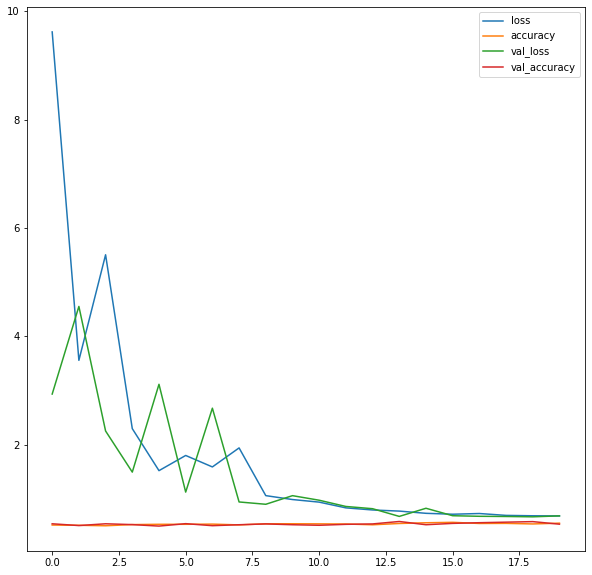

In [ ]:
# Bahaviour of loss and accuracy
pd.DataFrame(model4.history.history).plot(figsize = (10, 10))

In [ ]:
#Evaluation on Test data
model4.evaluate(test_data)

13/13 [==============================] - 3s 195ms/step - loss: 0.6886 - accuracy: 0.5350


[0.6886310577392578, 0.5350000262260437]